In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("cancelamentos.csv")
display(df)

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,349936.0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,100634.0,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,301263.0,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,119358.0,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,130955.0,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,195680.0,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,43477.0,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,169273.0,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,310693.0,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


In [5]:
df = df.drop(columns='CustomerID')
display(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   50000 non-null  float64
 1   sexo                    49997 non-null  str    
 2   tempo_como_cliente      49998 non-null  float64
 3   frequencia_uso          50000 non-null  float64
 4   ligacoes_callcenter     50000 non-null  float64
 5   dias_atraso             50000 non-null  float64
 6   assinatura              50000 non-null  str    
 7   duracao_contrato        50000 non-null  str    
 8   total_gasto             50000 non-null  float64
 9   meses_ultima_interacao  50000 non-null  float64
 10  cancelou                50000 non-null  float64
dtypes: float64(8), str(3)
memory usage: 4.2 MB


None

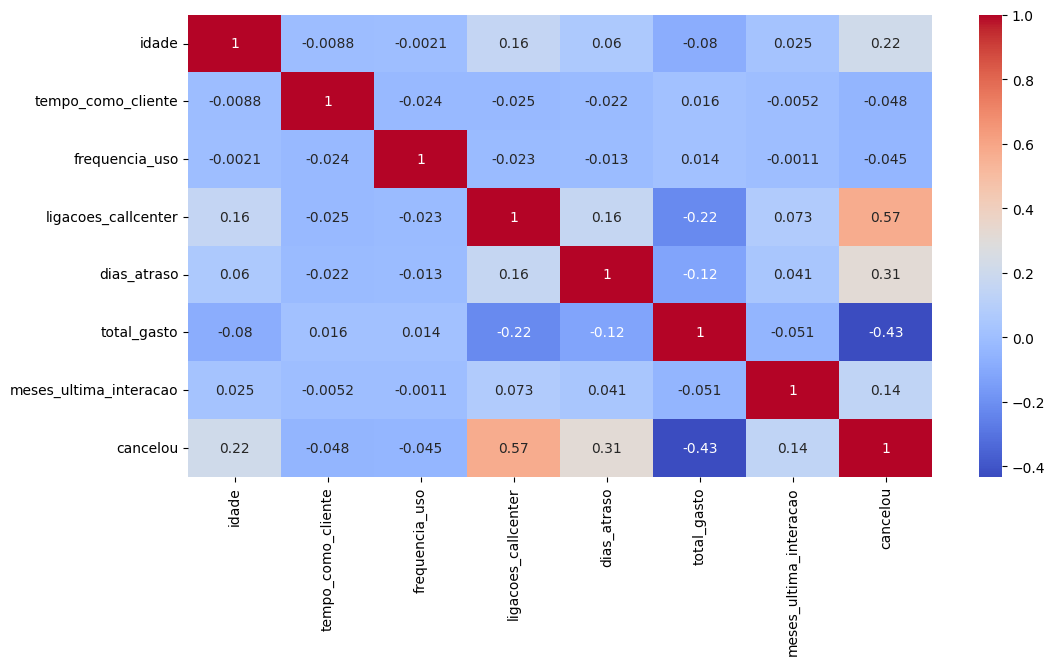

In [6]:
df = df.dropna()
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [7]:
df['status'] = df['cancelou'].map({0.0: 'Ativo', 1.0: 'Cancelado'})



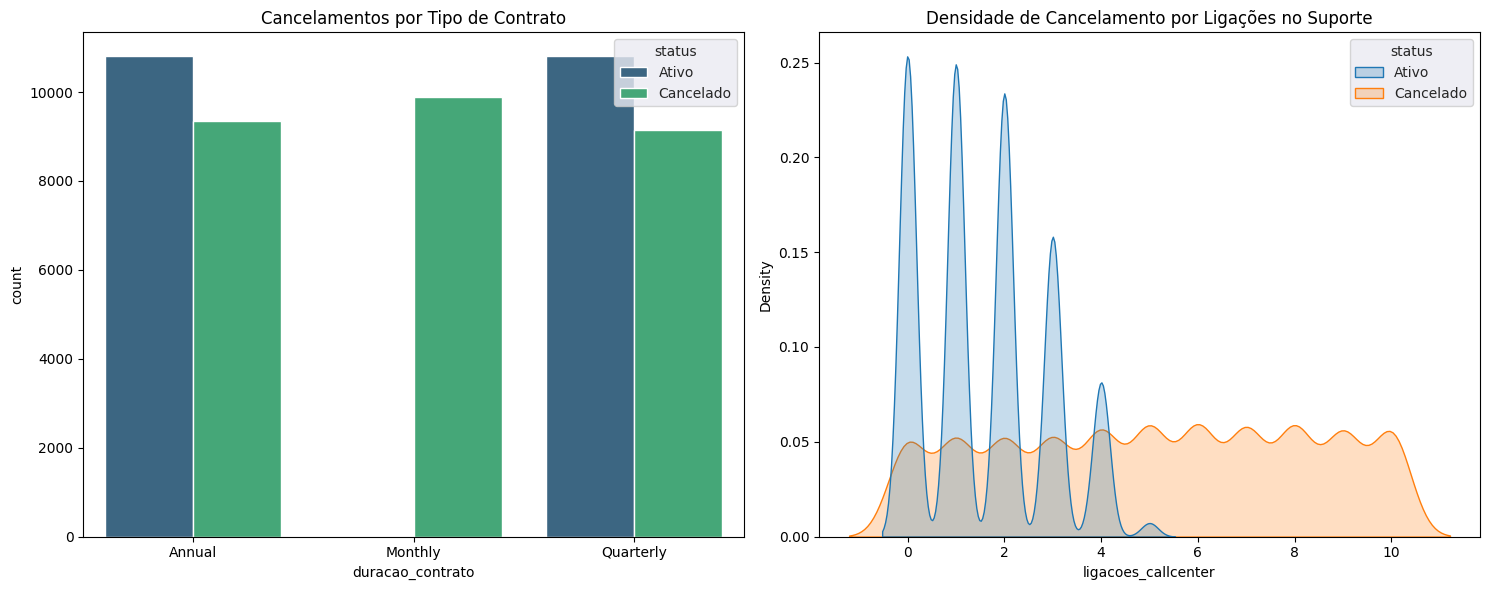

In [8]:
# Criando uma figura com vários subgráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.set_style("darkgrid")
# Gráfico 1: Tipo de Contrato vs Cancelamento
sns.countplot(data=df, x='duracao_contrato', hue='status', ax=axes[0], palette='viridis')
axes[0].set_title('Cancelamentos por Tipo de Contrato')

# Gráfico 2: Ligações no Call Center vs Cancelamento
sns.kdeplot(data=df, x='ligacoes_callcenter', hue='status', fill=True, ax=axes[1])
axes[1].set_title('Densidade de Cancelamento por Ligações no Suporte')

plt.tight_layout()
plt.show()

/tmp/ipykernel_14925/1024777835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='dias_atraso', palette='magma')


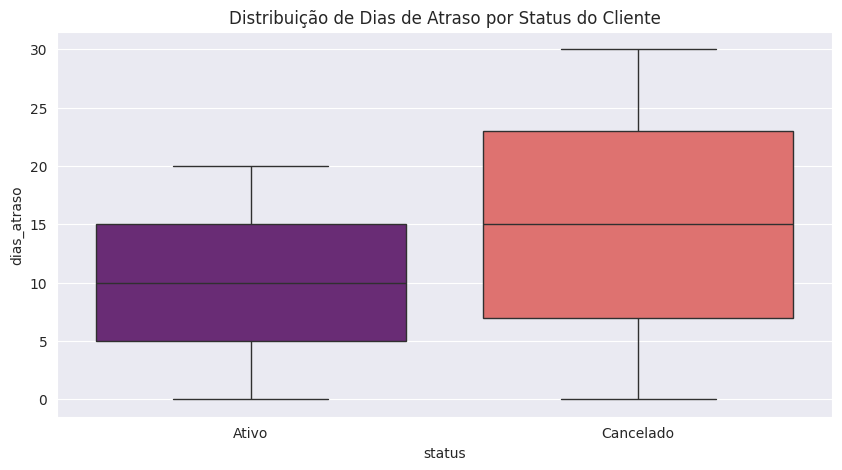

In [11]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.boxplot(data=df, x='status', y='dias_atraso', palette='magma')
plt.title('Distribuição de Dias de Atraso por Status do Cliente')
plt.show()

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou,status
0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0,Ativo
2,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0,Ativo
3,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0,Cancelado
4,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0,Cancelado
6,49.0,Male,6.0,7.0,0.0,0.0,Standard,Annual,751.00,11.0,0.0,Ativo
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,63.0,Male,16.0,24.0,2.0,18.0,Standard,Quarterly,442.00,26.0,1.0,Cancelado
49995,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0,Cancelado
49996,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0,Cancelado
49998,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0,Ativo


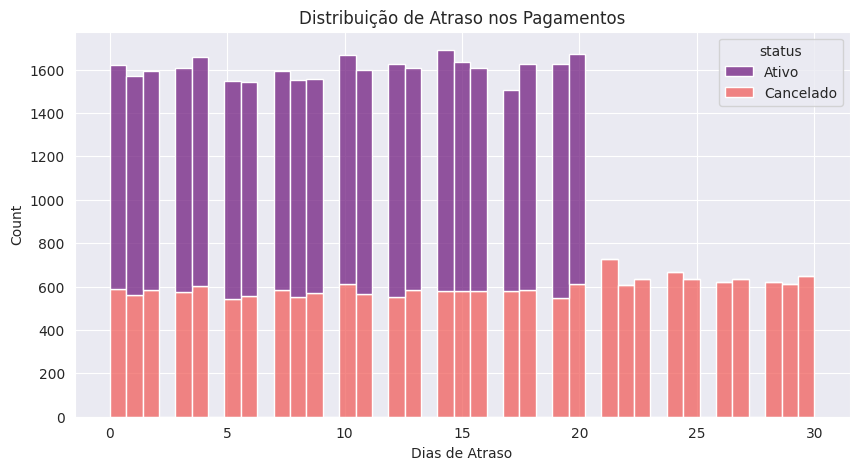

In [19]:
subdf1 = df[df['duracao_contrato']!="Monthly"]
display(subdf1)

# Gráfico 2: Ligações no Call Center vs Cancelamento
plt.figure(figsize=(10, 5))
sns.histplot(data=subdf1, x='dias_atraso', hue='status', multiple="stack", palette='magma')
plt.title('Distribuição de Atraso nos Pagamentos')
plt.xlabel('Dias de Atraso')
plt.show()


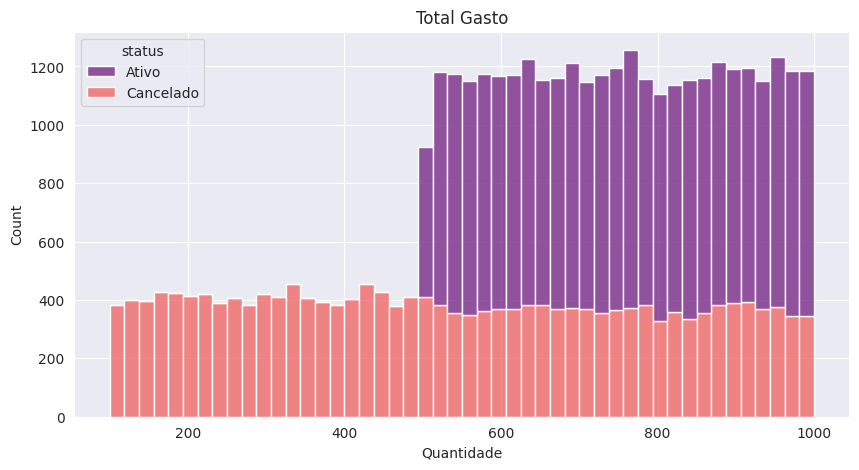

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data=subdf1, x='total_gasto', hue='status', multiple="stack", palette='magma')
plt.title('Total Gasto')
plt.xlabel('Quantidade')
plt.show()

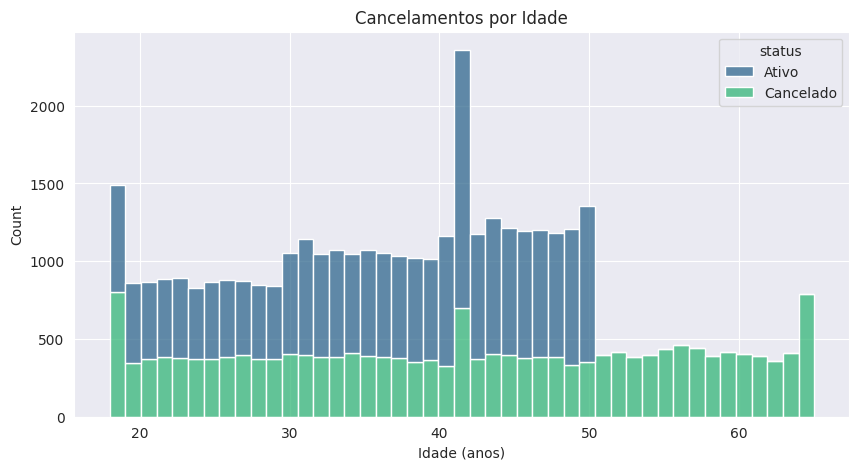

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(data=subdf1, x='idade', hue='status', multiple="stack", palette='viridis')
plt.title('Cancelamentos por Idade')
plt.xlabel('Idade (anos)')
plt.show()

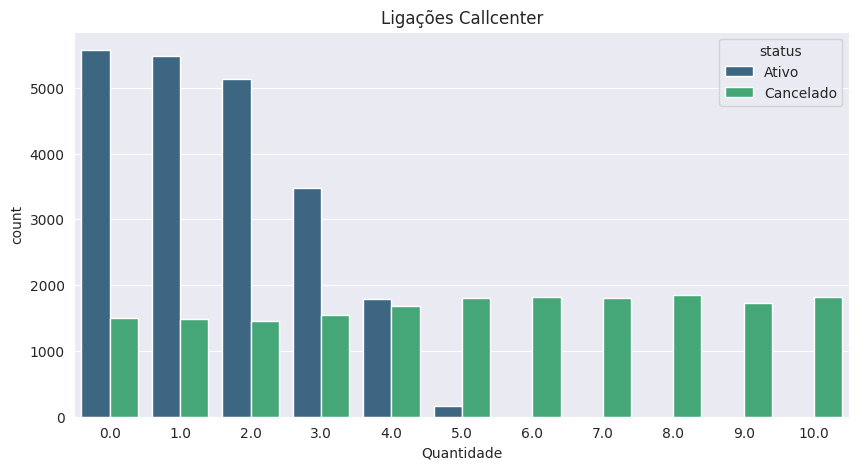

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(data=subdf1, x='ligacoes_callcenter', hue='status', palette='viridis')
plt.title('Ligações Callcenter')
plt.xlabel('Quantidade')
plt.show()